#Importing Libraires

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, precision_score, f1_score, recall_score
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle


#Loading Dataset

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Virtual Consultant (FYP)/Heart Disease/Preprocessed_data.csv")

In [ ]:
data.head()

,age,sex,resting bp s,cholesterol,fasting blood sugar,max heart rate,exercise angina,oldpeak,target,chest pain type_asymptomatic,chest pain type_atypical angina,chest pain type_non-anginal pain,chest pain type_typical angina,ST slope_downsloping,ST slope_flat,ST slope_normal,ST slope_upsloping,resting ecg_ST-T wave abnormality,resting ecg_left ventricular hypertrophy,resting ecg_normal
0,40,1,140,289,0,172,0,0.0,0,0,1,0,0,0,0,0,1,0,0,1
1,49,0,160,180,0,156,0,1.0,1,0,0,1,0,0,1,0,0,0,0,1
2,37,1,130,283,0,98,0,0.0,0,0,1,0,0,0,0,0,1,1,0,0
3,48,0,138,214,0,108,1,1.5,1,1,0,0,0,0,1,0,0,0,0,1
4,54,1,150,195,0,122,0,0.0,0,0,0,1,0,0,0,0,1,0,0,1


#Spliting the dependent and independent variables

In [ ]:
In = data.drop("target",axis = 1)
Output = data["target"]

#Spliting the data into train and test

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(In,Output,test_size = 0.2, random_state = 55)

#Normalizing the Data

In [ ]:
minmax = MinMaxScaler()
col = ["age","resting bp s","cholesterol","max heart rate","oldpeak"]
X_train[col] = minmax.fit_transform(X_train[col])
X_test[col] = minmax.transform(X_test[col])

#Machine learning Algorithms

##Logistic Regression Model

[]

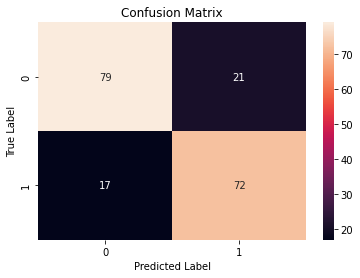

In [ ]:
lr = LogisticRegression(max_iter = 100)
lr.fit(X_train,Y_train)

y_pred_lr = lr.predict(X_test)
cm = confusion_matrix(Y_test,y_pred_lr)

sns.heatmap(cm,annot = True,fmt = ".3g")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title("Confusion Matrix")
plt.plot()

##Random Forest

[]

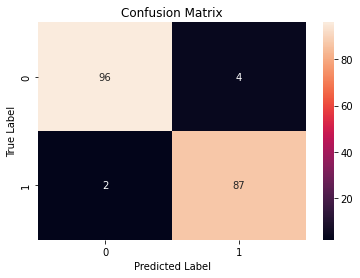

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)

y_pred_rf = rf.predict(X_test)
cm = confusion_matrix(Y_test,y_pred_rf)

sns.heatmap(cm,annot = True,fmt = ".3g")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title("Confusion Matrix")
plt.plot()

###Random Forest Hyperparameter tuning

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth, 'min_samples_split': min_samples_split,'min_samples_leaf': min_samples_leaf,'bootstrap': bootstrap}

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[]

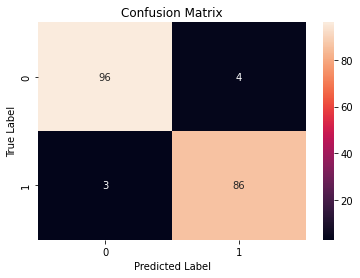

In [ ]:
rf_cv = RandomForestClassifier()
rf_ht = RandomizedSearchCV(rf_cv, param_distributions = random_grid, n_iter = 5, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_ht.fit(X_train,Y_train)

y_pred_rf_ht = rf_ht.predict(X_test)

cm = confusion_matrix(Y_test,y_pred_rf_ht)

sns.heatmap(cm,annot = True,fmt = ".3g")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title("Confusion Matrix")
plt.plot()

##XGBoost Classifier

[]

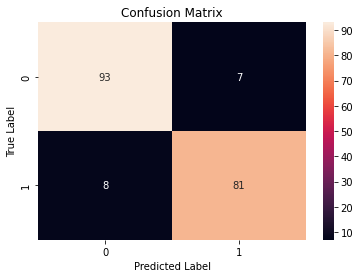

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train,Y_train)

y_pred_xg = xgb.predict(X_test)
cm = confusion_matrix(Y_test,y_pred_xg)

sns.heatmap(cm,annot = True,fmt = ".3g")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title("Confusion Matrix")
plt.plot()

##Extra Tree Classifier

[]

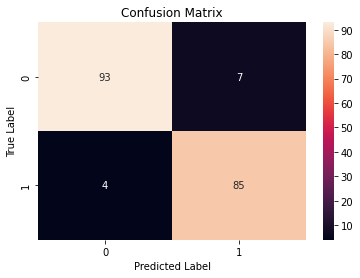

In [ ]:
Extratrees = ExtraTreesClassifier()
Extratrees.fit(X_train,Y_train)

y_pred_et = Extratrees.predict(X_test)
cm = confusion_matrix(Y_test,y_pred_et)

sns.heatmap(cm,annot = True,fmt = ".3g")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title("Confusion Matrix")
plt.plot()

##MLP

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[]

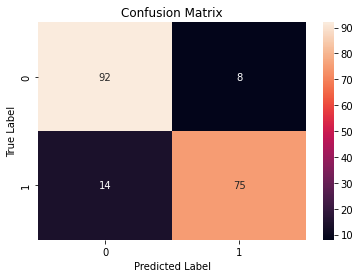

In [ ]:
Mlp = MLPClassifier(max_iter=1000, solver = "adam")
Mlp.fit(X_train,Y_train)

y_pred_mlp = Mlp.predict(X_test)
cm = confusion_matrix(Y_test,y_pred_mlp)

sns.heatmap(cm,annot = True)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title("Confusion Matrix")
plt.plot()


#Voting Classifier

[]

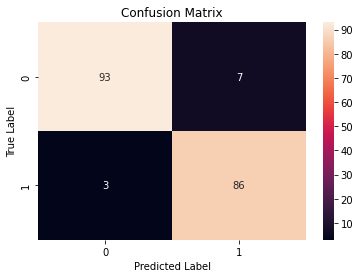

In [ ]:
estimator = [("XGBoost",XGBClassifier(colsample_bytree= 0.4,gamma= 0.4,learning_rate= 0.3,max_depth=5,min_child_weight= 1,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)),
             ("RandomForest",RandomForestClassifier(bootstrap = False, max_depth= 60, max_features =  'auto', min_samples_leaf= 2, min_samples_split= 2, n_estimators= 600)),
             ("SVC",SVC(probability = True))]
hard_voting = VotingClassifier(estimators = estimator, voting = "hard")
hard_voting.fit(X_train,Y_train)

y_pred_hard_voting = hard_voting.predict(X_test)
cm = confusion_matrix(Y_test,y_pred_hard_voting)

sns.heatmap(cm,annot = True)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title("Confusion Matrix")
plt.plot()


#Soft Voting

[]

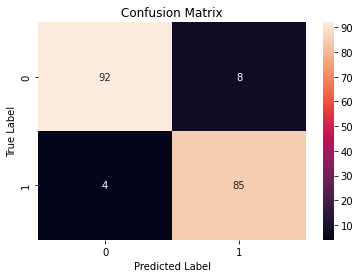

In [ ]:
estimator = [("XGBoost",XGBClassifier(colsample_bytree= 0.4,gamma= 0.4,learning_rate= 0.3,max_depth=5,min_child_weight= 1,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)),
             ("RandomForest",RandomForestClassifier(bootstrap = False, max_depth= 60, max_features =  'auto', min_samples_leaf= 2, min_samples_split= 2, n_estimators= 600)),
             ("SVC",SVC(probability = True))]
soft_voting = VotingClassifier(estimators = estimator, voting = "soft")
soft_voting.fit(X_train,Y_train)

y_pred_soft_voting = soft_voting.predict(X_test)
cm = confusion_matrix(Y_test,y_pred_soft_voting)

sns.heatmap(cm,annot = True)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title("Confusion Matrix")
plt.plot()


#Results

In [ ]:
accuracy_of_models = pd.DataFrame({
    "Train Accuracy":[lr.score(X_train,Y_train),
             rf.score(X_train,Y_train),
             rf_ht.score(X_train,Y_train),
             xgb.score(X_train,Y_train),
             Extratrees.score(X_train,Y_train),
             Mlp.score(X_train,Y_train),
             hard_voting.score(X_train,Y_train),
             soft_voting.score(X_train,Y_train)],
    "Test Accuracy":[lr.score(X_test,Y_test),
            rf.score(X_test,Y_test),
            rf_ht.score(X_test,Y_test),
            xgb.score(X_test,Y_test),
            Extratrees.score(X_test,Y_test),
            Mlp.score(X_test,Y_test),
            hard_voting.score(X_test,Y_test),
            soft_voting.score(X_test,Y_test)],
    "Precision":[precision_score(Y_test,y_pred_lr),
                 precision_score(Y_test,y_pred_rf),
                 precision_score(Y_test,y_pred_rf_ht),
                 precision_score(Y_test,y_pred_xg),
                 precision_score(Y_test,y_pred_et),
                 precision_score(Y_test,y_pred_mlp),
                 precision_score(Y_test,y_pred_hard_voting),
                 precision_score(Y_test,y_pred_soft_voting)],

    "Recall" :  [recall_score(Y_test,y_pred_lr),
                 recall_score(Y_test,y_pred_rf),
                 recall_score(Y_test,y_pred_rf_ht),
                 recall_score(Y_test,y_pred_xg),
                 recall_score(Y_test,y_pred_et),
                 recall_score(Y_test,y_pred_mlp),
                 recall_score(Y_test,y_pred_hard_voting),
                 recall_score(Y_test,y_pred_soft_voting)],

    "F1 Score" :  [f1_score(Y_test,y_pred_lr),
                 f1_score(Y_test,y_pred_rf),
                 f1_score(Y_test,y_pred_rf_ht),
                 f1_score(Y_test,y_pred_xg),
                 f1_score(Y_test,y_pred_et),
                 f1_score(Y_test,y_pred_mlp),
                 f1_score(Y_test,y_pred_hard_voting),
                 f1_score(Y_test,y_pred_soft_voting),
                 ]
            },
            index = ["Logistic Regression",
                     "Random Forest Without Hyperparameter Tuning",
                     "Random Forest With Hyperparameter Tuning",
                     "Extreme Gradient Boosting",
                     "Extra Tree Classifier",
                     "Multi Layer Perceptron",
                     "Voting Classifier (Hard Voting)",
                     "Voting Classifier (Soft Voting)"
                     ])
accuracy_of_models["Train Accuracy"] = (accuracy_of_models["Train Accuracy"]*100).round(decimals = 2)
accuracy_of_models["Test Accuracy"] = (accuracy_of_models["Test Accuracy"]*100).round(decimals = 2)
accuracy_of_models["Precision"] = (accuracy_of_models["Precision"]* 100).round(decimals = 2)
accuracy_of_models["Recall"] = (accuracy_of_models["Recall"]* 100).round(decimals = 2)
accuracy_of_models["F1 Score"] = (accuracy_of_models["F1 Score"]* 100).round(decimals = 2)
accuracy_of_models

,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score
Logistic Regression,85.30,79.89,77.42,80.90,79.12
Random Forest Without Hyperparameter Tuning,100.00,96.83,95.60,97.75,96.67
Random Forest With Hyperparameter Tuning,99.60,96.30,95.56,96.63,96.09
Extreme Gradient Boosting,94.70,92.06,92.05,91.01,91.53
Extra Tree Classifier,100.00,94.18,92.39,95.51,93.92
Multi Layer Perceptron,95.50,88.36,90.36,84.27,87.21
Voting Classifier (Hard Voting),99.60,94.71,92.47,96.63,94.51
Voting Classifier (Soft Voting),98.41,93.65,91.40,95.51,93.41


#Saving the best model

In [ ]:
#pickle.dump(rf,open("/content/drive/MyDrive/Virtual Consultant (FYP)/Heart Disease/rf_with_96.82% test .pkl","wb"))

In [ ]:
filename = "/content/drive/MyDrive/Virtual Consultant (FYP)/Heart Disease/rf_with_96.82% test .pkl"
with open(filename, 'rb') as file:
    model = pickle.load(file)